# Data Science
# Exercise 3 (Part 3/3: Toy Data Set)
<br/>se21m024
<br/>Thomas Stummer
<br/>Small Dataset: Heart Disease
<br/><br/>
*The interpretation of the data can be found in the document <b><i>se21m024_Stummer_ex2_Dim_Reduction.pdf</i><b>.
<br/><br/>
Data taken from:
<br/>https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
<br/><br/>

# Import necessary dependencies

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import math as math
import itertools as it
from sklearn.manifold import MDS
import sklearn.datasets as dt
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

pd.options.display.max_columns = None

%matplotlib inline

# Create toy dataset

In [30]:
np.random.seed(0)
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

X, y = varied

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Provide Calculation and Plot Function

In [48]:
def plot_data (X, algorithm, name):
    
    algorithm.fit(X)
    
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
    )
    # add red color for outliers (if any)
    colors = np.append(colors, ["#ff0000"])

    fig = plt.figure(2, (10,10))
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    plt.title(name)
    plt.xlabel("Coordinate 1")
    plt.ylabel("Coordinate 2")
    plt.show()

# Algorithm 1: MiniBatch KMeans


C:\Users\thomas.stummer\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


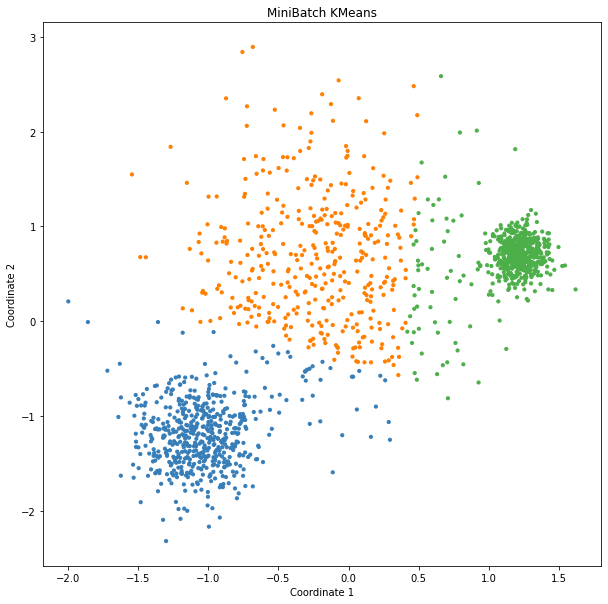

In [49]:
algorithm = cluster.MiniBatchKMeans(n_clusters=3)

plot_data(X, algorithm, "MiniBatch KMeans")

# Algorithm 2: Average Linkage


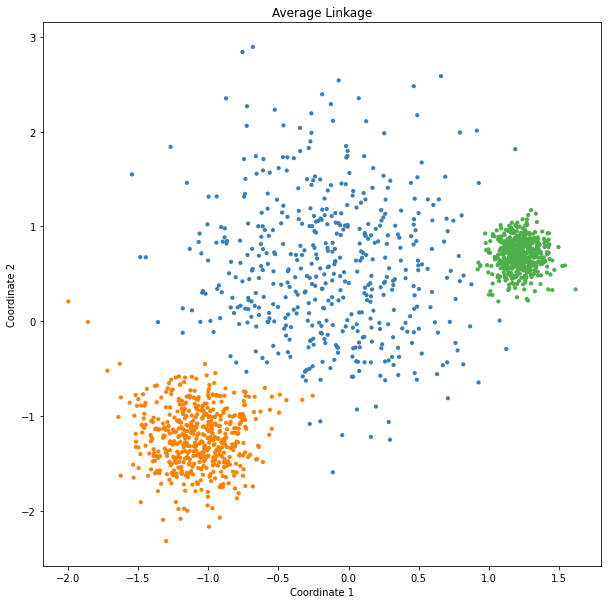

In [64]:
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=10, include_self=False
)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

algorithm = cluster.AgglomerativeClustering(
    linkage="ward",
    affinity="euclidean",
    n_clusters=3,
    connectivity=connectivity    
)

plot_data(X, algorithm, "Average Linkage")

# Algorithm 3: DBSCAN


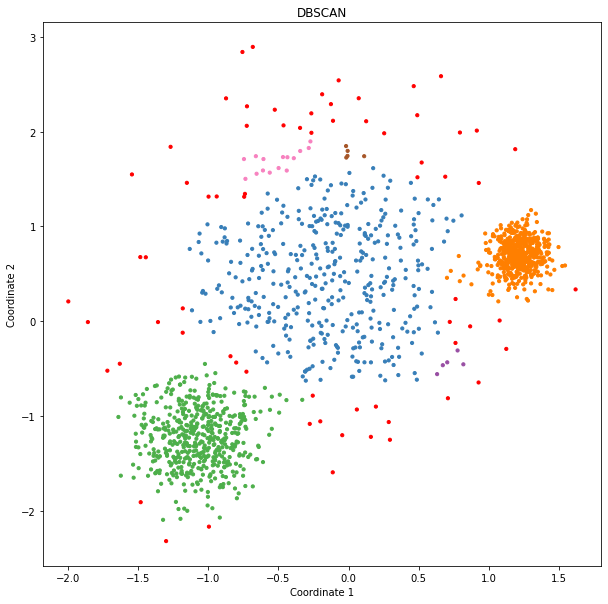

In [58]:
algorithm = cluster.DBSCAN(eps=0.16)

plot_data(X, algorithm, "DBSCAN")